# LLM Hands-On: Learn by Doing with Large Language Models

This Jupyter Notebook is your interactive guide to gaining practical skills in working with Large Language Models (LLMs). Through hands-on exercises, you will learn how to:

* **Utilize LLMs:** Effectively use LLMs through different methods, including:
    * Leveraging the Gemini API.
    * Running open-source models locally with Ollama.
    * Interacting with LLMs using the Langchain framework.
* **Work with Embeddings:** Understand the significance of embeddings and learn how to generate them using LLMs.
* **Engineer Effective Prompts:** Master various prompt engineering techniques to elicit desired responses from LLMs, such as zero-shot, few-shot, chain-of-thought, self-consistency, and ReAct.
* **Implement Retrieval-Augmented Generation (RAG):** Build RAG pipelines with Langchain to integrate external data with LLMs for enhanced performance.

Start building your LLM expertise today!

In [1]:
# Install core libraries
!pip install transformers torch requests pandas matplotlib scikit-learn

# Install LangChain and related dependencies
!pip install langchain chromadb openai langchain_community langchain-google-genai faiss-cpu pymupdf

# Install Gemini-specific dependencies
!pip install google-genai

# Install additional utilities
!pip install sentencepiece sacremoses ollama

# Ragas
!pip install ragas rapidfuzz unstructured "unstructured[md]"

# Progress
!pip install tqdm


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## Transformers: Using the Hugging Face Transformers Library
The hugging Face Transformers library is a powerful tool for working with various pre-trained models, including LLMs. In this section, we will explore how to use the Transformers library to load and interact with LLMs.
- in order to use the transformers library, you need to login to the hugging face hub
- you can do this by running the following command in your terminal:
```bash
huggingface-cli login
```
- you will be prompted to enter your hugging face token, which you can obtain from your hugging face account settings.

Now let's load a pre-trained model and use it for text generation.

In [2]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load a pre-trained model and tokenizer from Hugging Face
model_name = 'gpt2'  # Specify the model name
model = GPT2LMHeadModel.from_pretrained(model_name)  # Load model with language model head
tokenizer = GPT2Tokenizer.from_pretrained(model_name)  # Load the tokenizer

# Generate text using the model
input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
output = model.generate(input_ids, max_length=50, num_return_sequences=1)

# Decode the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
generated_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


'Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a'

Most of the time, you will want to use the `pipeline` function from the `transformers` library. This function allows you to easily load a pre-trained model and use it for various tasks, such as text generation, translation, and more.

In [3]:
# Load qwen model from transformers
from transformers import pipeline
"""
Pipelines are utility factory method to build a [`Pipeline`].

A pipeline consists of:
    - One or more components for pre-processing model inputs, 
      e.g. tokenization, feature extraction, etc.
    - A model for inference.
    - One or more components for post-processing model outputs, 
      e.g. decoding, etc.
"""
qwen = pipeline('text-generation', model='gpt2')
qwen("Once upon a time", max_length=50, num_return_sequences=1, truncation=True)

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time, I think that our future is inextricably linked to our present, and now and in future centuries. I think this is what I think has happened during this millennium.\n\nI always hoped that there would be an'}]

Some LLMs are not available from the Hugging Face Hub, since they are not open source. For example, the Gemini LLMs are only available through the Gemini API. In this case, you will need to use the `requests` library to make API calls to the Gemini API. You can find more information about the Gemini API in the [Gemini documentation](https://www.gemini.com/docs/api).
Also consider the following: https://aistudio.google.com/prompts/new_chat
In the following, a simple examples using gemini API:

In [4]:
from google import genai
# take the key from secret.txt
with open('secret_gemini.txt', 'r') as f:
    key = f.read().strip()
client = genai.Client(
    api_key=key
)
model = "gemini-2.0-flash"
prompt = "Once upon a time"
# Generate text using the model
response = client.models.generate_content(model=model, contents=prompt, config={'max_output_tokens': 20})
response.candidates[0].content.parts[0].text

'Once upon a time, in a land painted with emerald forests and sapphire rivers, nestled a village called'

## Ollama Service -- Fastly use server LLMs
There are also service which allow you to download the data just once and then have a common interface for several models (similar to pipeline, but more flexible). One of these services is [Ollama](https://ollama.com/), which allows you to run models locally. You can find more information about Ollama in the [Ollama documentation](https://docs.ollama.com/).
First you need to install ollama:
```bash
curl -sSfL https://ollama.com/download.sh | sh
```
Then you can run the following command to download a model:
```bash
ollama pull <model_name>
```
For example, to download the `llama2` model, you can run:
```bash
ollama pull llama2
```
After this, you may used those madels with the ollama command line interface or with the ollama python library.

In [5]:
import ollama
reply = ollama.list() # list all models
[model.model for model in reply.models]

['qwen2.5:1.5b',
 'qwen2.5:3b',
 'smollm:latest',
 'smollm:360m',
 'mxbai-embed-large:latest',
 'smollm:135m',
 'all-minilm:latest']

In [6]:
# use qwen2.5 model
qwen = ollama.generate(model="qwen2.5:1.5b", prompt="Once upon a time", options={"num_predict": 50})
qwen.response

'I apologize, but "once upon a time" is typically used as an introductory phrase in storytelling or fairy tales to set the scene at the beginning of a narrative. It\'s not a command or instruction and doesn\'t require a response from me unless you'

## Open Router -- Remove Services for (closed) LLMs
Finally, there are also remote service which works as a proxy for several models.
One of then is openrouter, which allows you to use several models through a common interface. You can find more information about openrouter in the [openrouter documentation](https://openrouter.ai/docs).


In [7]:
from openai import OpenAI
# take the key from secret.txt
with open('secret_open_router.txt', 'r') as f:
    key = f.read().strip()


client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=key,
)

client.completions.create(model="openrouter/quasar-alpha", prompt="Once upon a time", max_tokens=50).choices[0].text

'Once upon a time, in a peaceful village nestled between lush green hills and sparkling rivers, lived a curious young girl named Mira. Every day, she dreamed of exploring the world beyond her small village, yearning for exciting adventures and new friendships. One sunny'

## Embedding Generation
Each platform may also support embeddings generation, 
that is a way to convert text into a vector representation, which can be used for various tasks such as similarity search, clustering, and more.
In the following, an example with gemini:


In [8]:
# take the key from secret.txt
with open('secret_gemini.txt', 'r') as f:
    key = f.read().strip()
client = genai.Client(
    api_key=key
)
model = "text-embedding-004"
prompt = "Once upon a time"
# Generate text using the model
response = client.models.embed_content(model=model, contents=prompt)
response.embeddings[0].values[0:10]

[-0.024470856,
 -0.03917013,
 -0.033633582,
 0.0007542654,
 0.017265115,
 0.028692706,
 0.10415812,
 0.026976734,
 -0.013802847,
 0.02321082]

### Understanding Embedding Semantics
We have prepared a dataset containing 500 sentences, each featuring a sentence about a specific topic paired with a question related to that topic.

In the following section, we will generate embeddings for this dataset and visualize them to explore their semantic relationships. This visualization will help us understand how the embedding model captures the meaning and relationships between different sentences.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('data.csv')
df.head()

,sentence,topic
0,Il sole splende alto nel cielo azzurro.,Meteo
1,L'azienda ha annunciato un aumento dei profitt...,Economia
2,La ricetta della torta di mele della nonna è l...,Cucina
3,La squadra di calcio ha vinto la partita all'u...,Sport
4,Il nuovo libro dello scrittore è un thriller a...,Libri


In [10]:
# Embeddings part -- take all the sentences in the dataset and, leveraging the remove service, embed them accordingly
sentences = df['sentence'].tolist()
# embed everything
chuncks = 100
embeddings = []
for i in range(0, len(sentences), chuncks):
    chunk = sentences[i:i + chuncks]
    response = client.models.embed_content(model=model, contents=chunk)
    embeddings += response.embeddings

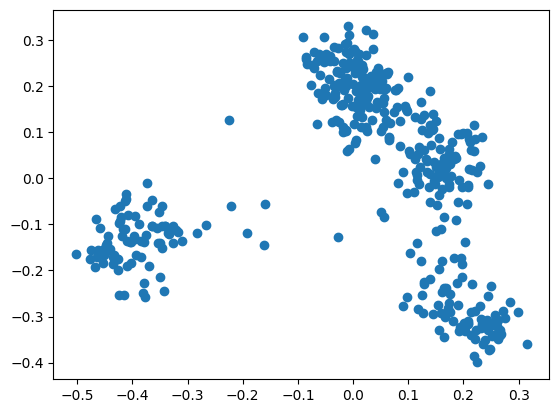

In [11]:
values_sentences = [ embedding.values for embedding in embeddings]
# plot as scatter 2D using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(values_sentences)
X = pca.transform(values_sentences)
plt.scatter(X[:, 0], X[:, 1])

### On Semantics
To understand if the embedded generated truly follow the semantics of the terms, we tried also to embeded the topics
and check if them are near to the "bubble" that seems to emerges.

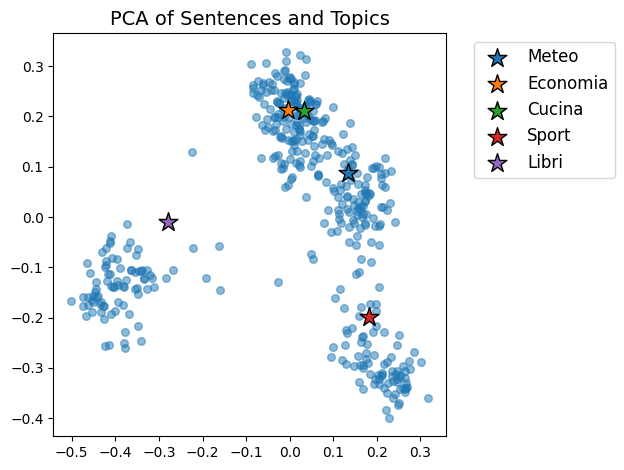

In [12]:
# take also the topics and plot them
topics = df['topic'].tolist()
# distinct topics
topics = list(set(topics))
# embed the topics
embeddings = []
result = client.models.embed_content(model=model, contents=topics)
values = [embedding.values for embedding in result.embeddings]

# pca for everything
pca = PCA(n_components=2)
pca.fit(values_sentences + values)
X = pca.transform(values_sentences + values)

# Create a color map for topics
import matplotlib.colors as mcolors
topic_colors = list(mcolors.TABLEAU_COLORS.values())[:len(topics)]
color_map = dict(zip(topics, topic_colors))

# Plot sentences as small points
plt.scatter(X[:len(values_sentences), 0], X[:len(values_sentences), 1], alpha=0.5, s=30)

# Plot topics as larger stars with different colors
for i, topic in enumerate(topics):
    plt.scatter(X[len(values_sentences) + i, 0], X[len(values_sentences) + i, 1], 
               c=topic_colors[i], s=200, marker='*', label=topic, edgecolor='black')

# Add a legend and title
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA of Sentences and Topics", fontsize=14)
plt.tight_layout()
plt.show()


## Models Agnosticism: LangChain

When working with different LLM providers, switching between models often requires significant code changes. This approach is:

- Error prone
- Difficult to maintain
- Difficult to extend
- Difficult to test

LangChain solves this problem by providing a unified interface for all LLM models. This abstraction layer allows you to:

- Switch between different LLM providers with minimal code changes
- Create reusable components that work across different models
- Build complex pipelines that are model-agnostic
- Focus on your application logic rather than provider-specific implementation details

With LangChain, you can easily swap between Ollama, Gemini, OpenAI, or any other supported provider by changing just a few lines of code, while keeping your business logic intact.

In [13]:
import os
# use ollama
from langchain.llms import Ollama
from langchain.embeddings import OllamaEmbeddings
# use gemini
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
with open('secret_gemini.txt', 'r') as f:
    key = f.read().strip()
os.environ['GOOGLE_API_KEY'] = key
# load the model 
llm = Ollama(model="smollm:360m")
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm.invoke("Write me a ballad about LangChain")

/tmp/ipykernel_3530/2000195655.py:12: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="smollm:360m")


AIMessage(content="(Verse 1)\nIn days of yore, when AI was young,\nAnd models spoke with silver tongue,\nA need arose, a growing pain,\nTo chain their thoughts, to make them reign.\nFor single prompts, though bright and keen,\nCould not unravel complex scene.\nA hero rose, with code so grand,\nA library known as LangChain'd stand.\n\n(Verse 2)\nHarrison Chase, the architect bold,\nA vision clear, a story told,\nOf chains of logic, step by step,\nWhere tasks were solved, while others slept.\nHe built the tools, the layers deep,\nWhere language models secrets keep.\nFrom agents wise to memory bright,\nLangChain emerged, a guiding light.\n\n(Verse 3)\nConnect the LLMs, one to all,\nThrough agents that heed duty's call.\nA search for knowledge, wide and far,\nThen tools to wield, like guiding star.\nFrom Wikipedia's endless page,\nTo databases, in wisdom's cage,\nLangChain orchestrates the quest,\nTo answer queries, put to the test.\n\n(Verse 4)\nWith prompts as seeds, the chains unfold,\n

In [14]:
# ollama embeddings
embedding = OllamaEmbeddings(model="mxbai-embed-large:latest")
# gemini embedding
embedding = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
embeddings = embedding.embed_documents(sentences)
embeddings[0][0:10]

/tmp/ipykernel_3530/3386066127.py:2: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embedding = OllamaEmbeddings(model="mxbai-embed-large:latest")


[-0.01490800455212593,
 0.009274010546505451,
 0.008774762973189354,
 -0.006873081438243389,
 0.01068467739969492,
 0.010048678144812584,
 -0.016690418124198914,
 -0.007669678423553705,
 0.0644388198852539,
 0.04650546982884407]

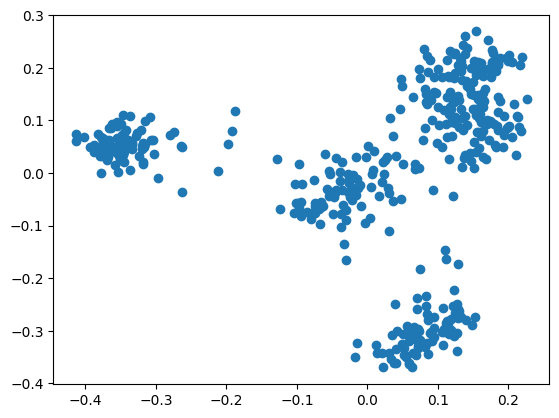

In [15]:
# plot the embeddings with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(embeddings)
X = pca.transform(embeddings)
plt.scatter(X[:, 0], X[:, 1])

## Reproducibility: Temperature and Other Parameters

When using LLMs, you may want to control the randomness of the generated text. This is often done by adjusting the temperature parameter:

- **Low temperature** (e.g., 0.2): Produces more deterministic, focused, and conservative responses
- **High temperature** (e.g., 0.8): Generates more diverse, creative, and sometimes unpredictable outputs

Temperature is one of the most important parameters you can adjust to control the behavior of an LLM. Other parameters that affect generation include:

- **Top-p (nucleus sampling)**: Controls diversity by only considering tokens whose cumulative probability exceeds a threshold
- **Max tokens**: Limits the length of the generated response

In the following cells, we will generate several replies with different temperatures and compare them to demonstrate how this parameter impacts LLM outputs.


In [16]:
from tqdm import tqdm
import time

temperatures = [0.1, 0.5, 1.0, 2.0]
results_all = {}

# Create a progress bar for the temperatuwre iterations
for temperature in tqdm(temperatures, desc="Processing temperatures"):
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=temperature, max_output_tokens=50)
    results = []
    
    # Create inner progress bar for each result iteration
    for i in range(5):
        result = llm.invoke("Write me a ballad about LangChain").content
        results.append(result)
        # Small delay to make progress visible
        #time.sleep(0.1)
    
    results_all[temperature] = results

Processing temperatures: 100%|██████████| 4/4 [00:19<00:00,  4.96s/it]


In [17]:
# print the result nicely
for temperature, results in results_all.items():
    print(f"Temperature: {temperature}")
    for i, result in enumerate(results):
        print(f"Result {i + 1}: {result}")
        print("----")
    print()

Temperature: 0.1
Result 1: (Verse 1)
In realms of code, where data streams,
A challenge rose, it haunted dreams.
To weave the words, to understand,
The human tongue, across the land.
For AI's might, though
----
Result 2: (Verse 1)
In realms of code, where data streams,
And knowledge sleeps in digital dreams,
A challenge rose, a mighty quest,
To bridge the gap, and put to test,
The power of language, deep
----
Result 3: (Verse 1)
In realms of code, where data streams flow,
A challenge arose, a knowledge to sow.
To bridge the gap, 'twixt language and might,
A framework was born, to bring forth the
----
Result 4: (Verse 1)
In realms of code, where data streams,
And knowledge sleeps in digital dreams,
A challenge rose, a tangled plight,
To weave the threads of dark and light.
For AI's mind, though
----
Result 5: (Verse 1)
In realms of code, where data streams,
And knowledge sleeps in digital dreams,
A challenge rose, a mighty quest,
To bridge the gap, and put to test,
The power of language

## Prompt Engineering
In the rest of the notebook, we will explore various prompt engineering techniques to improve the performance of LLMs.
We will use LangChain to implement these techniques.

Prompt engineering is the practice of crafting effective inputs to guide LLMs toward producing desired outputs. Well-designed prompts can significantly enhance model performance for specific tasks without changing the underlying model.

This section covers several key prompt engineering strategies:
- Zero-shot prompting: Directing the model without examples
- Few-shot learning: Providing examples to establish patterns
- Chain-of-thought: Guiding the model through reasoning steps
- Self-consistency: Generating multiple responses to improve reliability
- ReAct: Combining reasoning and action for complex problem-solving

Each technique offers different advantages depending on the task complexity, required precision, and available context.

### Zero-shot Prompting

The zero-shot prompting technique involves providing the model with a task description and asking it to generate a response without any additional context or examples.
This approach is useful when you want the model to generate text based on a specific instruction or question without any prior examples.

#### When It Works Best
- For straightforward tasks where the instruction is clear
- When the task aligns with the model's pre-training
- When you have limited time or resources to create examples

#### Pros
- Simplicity: No need to create or maintain examples
- Flexibility: Can be quickly adapted to new tasks
- Efficiency: Requires less prompt engineering effort
- Less bias: Avoids potential biases that might be introduced in examples

#### Cons
- Lower precision: May produce less accurate or consistent results
- Less control: Output style and format may vary significantly
- Task dependence: Performance heavily depends on the model's prior knowledge
- Context limitation: Model may miss subtle requirements without examples

In [18]:
# Example with langchain
from langchain.prompts import PromptTemplate

# Define a prompt template for zero-shot prompting
prompt_template = PromptTemplate(
    input_variables=["input"],
    template="You are a personal trainer, I will send you the age, weight, height and activity level of a person, and you will give me a training plan for him. The data are the following: {input}"
)

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
# Define the input data
input_data = "age: 25, weight: 70kg, height: 180cm, activity level: moderate"
# Generate the prompt
prompt = prompt_template.format(input=input_data)
# Generate the response using the LLM
response = llm.invoke(prompt).content
response

'Okay, great! I\'m ready to help you create a training plan for this individual. Here\'s a workout plan tailored for a 25-year-old, 70kg, 180cm individual with a moderate activity level.  Remember to consult with a doctor before starting any new exercise program.\n\n**Important Considerations:**\n\n*   **Warm-up:** Always begin each workout with 5-10 minutes of light cardio (jogging in place, jumping jacks, arm circles) and dynamic stretching (leg swings, torso twists, arm circles).\n*   **Cool-down:** End each workout with 5-10 minutes of static stretching, holding each stretch for 20-30 seconds. Focus on the muscles worked during the session.\n*   **Progression:** Gradually increase the weight, reps, sets, or intensity as the individual gets stronger.\n*   **Listen to Your Body:** Rest when needed. Don\'t push through pain.\n*   **Nutrition:** This plan focuses on exercise. A balanced diet is crucial for achieving fitness goals.\n\n**Training Plan (5 days a week):**\n\nThis plan inco

### Few-Shot Learning (in-context learning)

Few-shot learning is a technique where you provide the model with a few examples of the desired input-output pairs to guide its responses. By showing examples, you help the model understand the pattern you expect without explicit instructions.

#### When It Works Best
- For tasks with clear patterns that can be demonstrated through examples
- When consistency in output format is important
- When the model needs guidance on specific styles or structures
- For specialized domains where examples can clarify expectations

| Pros | Cons |
|------|------|
| **Better format control:** Generates responses that match your examples' structure | **Example bias:** Model may copy patterns from examples too strictly |
| **Reduced ambiguity:** Shows rather than tells what you want | **Limited generalization:** May struggle with inputs very different from examples |
| **Flexibility:** Can be combined with other prompting techniques | **Prompt space constraints:** Examples consume token space that could be used for other content |
| **Less verbose:** Often requires less instruction text than explaining rules | **Selection challenge:** Requires carefully chosen examples that represent the desired patterns |


In [19]:
prompt_template = PromptTemplate(
    input_variables=["input"],
    template="You are a personal trainer, I will send you the age, weight, height and activity level of a person, and you will give me a training plan for him. The data are the following: {input}. Here are some examples: \n1. age: 25, weight: 70kg, height: 180cm, activity level: moderate => training plan: 3 days a week of moderate intensity cardio and strength training.\n2. age: 30, weight: 80kg, height: 175cm, activity level: high => training plan: 5 days a week of high intensity cardio and strength training.\n3. age: 40, weight: 90kg, height: 170cm, activity level: low => training plan: 2 days a week of low intensity cardio and strength training.\n4. age: 35, weight: 75kg, height: 185cm, activity level: moderate => training plan: \n reply JUST as shown in the examples, without any additional text. \n\n"
)

# Define the input data
input_data = "age: 35, weight: 75kg, height: 185cm, activity level: moderate"
# Generate the prompt
prompt = prompt_template.format(input=input_data)
# Generate the response using the LLM
response = llm.invoke(prompt).content
response

'3 days a week of moderate intensity cardio and strength training.'

### Chain-of-Thought Prompting

Chain-of-thought prompting is a technique where you guide the model through a step-by-step reasoning process before arriving at the final answer. This approach helps the model break down complex problems and solve them more systematically.

#### When It Works Best
- For complex reasoning tasks that benefit from a structured approach
- When solving math problems, logical puzzles, or multi-step reasoning
- For tasks where intermediate steps matter, not just the final answer
- When accuracy is more important than speed or token efficiency

#### Pros
- Improved accuracy: Helps models solve complex problems more reliably
- Transparency: Makes the reasoning process visible and auditable
- Error detection: Easier to identify where reasoning went wrong
- Knowledge organization: Forces structured thinking about complex topics

#### Cons
- Token consumption: Requires more tokens than direct prompting
- Overhead: More elaborate prompts take longer to craft and process
- Not always necessary: May be overkill for simple, straightforward tasks
- Model-dependent: Works better with more capable models that can follow complex reasoning

In [20]:
# Define a prompt template for chain-of-thought prompting
prompt_template = PromptTemplate(
    input_variables=["input"],
    template="You are a logical thinker. Solve the following problem step by step: {input}\n\n"
             "Step 1: Identify the formula or method to solve the problem.\n"
             "Step 2: Substitute the given values into the formula.\n"
             "Step 3: Perform the calculation to find the answer.\n"
             "Step 4: Provide the final answer.\n\n"
)


# Define the input problem
input_problem = "If a car travels 150 miles in 3 hours, what is its speed?"

# Generate the prompt
prompt = prompt_template.format(input=input_problem)

# Generate the response using the LLM
response = llm.invoke(prompt).content
normal = llm.invoke(input_problem).content
response, normal

("Okay, let's break this down:\n\n**Step 1: Identify the formula or method to solve the problem.**\n\n*   The problem involves distance, time, and speed. The relationship between these is:\n\n    *   Speed = Distance / Time\n\n**Step 2: Substitute the given values into the formula.**\n\n*   Distance = 150 miles\n*   Time = 3 hours\n\n    *   Speed = 150 miles / 3 hours\n\n**Step 3: Perform the calculation to find the answer.**\n\n*   Speed = 150 / 3\n*   Speed = 50\n\n**Step 4: Provide the final answer.**\n\n*   The car's speed is 50 miles per hour (mph).",
 "Speed is calculated by dividing the distance traveled by the time taken.\n\nSpeed = Distance / Time\n\nIn this case:\n\nSpeed = 150 miles / 3 hours = 50 miles per hour\n\nSo the car's speed is $\\boxed{50}$ miles per hour.")

### Self-consistency

Self-consistency is a technique where you generate multiple responses to the same prompt and select the most consistent or relevant one. This approach helps improve the reliability of the generated text by reducing noise and variability in the output.

#### When It Works Best
- For tasks that require high accuracy and reliability
- When dealing with complex reasoning problems
- For applications where errors could have significant consequences
- When you have the computational resources to generate multiple responses

#### Pros
- Improved accuracy: Aggregating multiple responses can filter out errors
- Increased reliability: Reduces the impact of random variations in model output
- Better for reasoning tasks: Particularly effective for math or logical reasoning
- Error detection: Helps identify inconsistencies in model responses

#### Cons
- Resource intensive: Requires generating multiple responses for each query
- Increased latency: Takes longer to produce the final result
- Implementation complexity: Requires additional code to manage and compare responses


In [21]:
def self_consistency(llm, prompt, n=5):
    """
    Generate multiple responses for a given prompt and return the most common one.
    """
    responses = []
    for i in range(n):
        response = llm.invoke(prompt).content
        responses.append(response)
    # Count the occurrences of each response
    response_counts = {}
    for response in responses:
        if response in response_counts:
            response_counts[response] += 1
        else:
            response_counts[response] = 1
    # Find the most common response
    most_common_response = max(response_counts, key=response_counts.get)
    return most_common_response

# Example usage
prompt = "If a car travels 150 miles in 3 hours, what is its speed?, just reply with the number"
# Generate multiple responses and find the most common one
common_response = self_consistency(llm, prompt, n=5)
common_response

'50'

## Advanced Prompting Engineering: RAG and ReAct
Retrieval-Augmented Generation (RAG) is a powerful technique that combines the strengths of LLMs with external knowledge sources. By integrating retrieval mechanisms, RAG allows models to access relevant information from large datasets or databases, enhancing their performance on various tasks.
RAG is particularly useful for tasks that require up-to-date information, domain-specific knowledge, or context beyond the model's training data. It enables LLMs to generate more accurate and contextually relevant responses by leveraging external information.
ReAct is a prompting technique that combines reasoning and action to improve the performance of LLMs on complex tasks. By guiding the model through a series of reasoning steps and allowing it to take actions based on its conclusions, ReAct helps models generate more accurate and contextually relevant responses.


### Retrieval-Augmented Generation (RAG)

Retrieval-Augmented Generation (RAG) combines LLMs with external knowledge sources to enhance the model's capabilities. RAG consists of two main components:

- **Retriever:** Fetches relevant information from external sources using techniques like vector search
- **Generator:** Creates coherent responses by incorporating retrieved information with the query

#### When It Works Best
- When factual accuracy and up-to-date information is critical
- For domain-specific applications requiring specialized knowledge
- To reduce hallucinations by grounding responses in verified data
- For answering questions about content outside the model's training data

#### Pros
- **Improved accuracy:** Responses are grounded in reliable information
- **Reduced hallucinations:** Models are less likely to generate incorrect facts
- **Knowledge extensibility:** Can incorporate new information without retraining
- **Transparency:** Sources can be cited to support generated content
- **Customization:** Can be tailored to specific domains or use cases

#### Cons
- **Complexity:** Requires building and maintaining retrieval systems
- **Latency:** Additional retrieval step increases response time
- **Quality dependence:** Performance relies on both retrieval accuracy and generation quality
- **Implementation overhead:** Requires vector databases and embedding models
- **Context limitations:** May struggle with very long or complex retrieved content


In [22]:
from langchain.chains import RetrievalQA
from langchain.vectorstores import FAISS
from langchain.prompts import PromptTemplate
from langchain.document_loaders import TextLoader

# Load documents
loader = TextLoader('rag.txt')  # Replace 'data.txt' with your document file
documents = loader.load()

# Create embeddings for the documents
embedding_model = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
### Create a vector store using FAISS 
vectorstore = FAISS.from_documents(documents, embedding_model)

# Create a retriever
retriever = vectorstore.as_retriever()

# Define the prompt template
prompt_template = PromptTemplate(
    input_variables=["context", "question"],
    template="Use the following context to answer the question:\n\nContext: {context}\n\nQuestion: {question}\n\nAnswer:"
)

# Initialize the LLM
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# Create the RetrievalQA chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type_kwargs={"prompt": prompt_template}
)

# Example query
query = "What is a cheat day?"
response = qa_chain.run(query)
response

/tmp/ipykernel_3530/30581754.py:36: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = qa_chain.run(query)


'Allowing yourself to indulge in your favorite “less nutritious” foods on the occasion is a good thing. The occasional indulgence prevents you from feeling deprived and helps you stick to your healthy eating goals. This can look like a cheat day or meal, or having one cookie or piece of candy daily, whatever it is, enjoy it in the moment and stick to your overall health habits in between.'

# ReAct

ReAct (Reasoning and Acting) is a prompting technique that combines reasoning steps with actions to improve the performance of Large Language Models on complex tasks. It provides a structured framework that helps models break down problems and solve them through a systematic process of thinking and acting.

## When It Works Best
- For complex tasks requiring both reasoning and external information
- When solving problems that benefit from a step-by-step approach
- For tasks involving decision making and information gathering
- When accuracy is more important than speed or response length

## Pros
- **Improved problem-solving**: Helps models tackle complex multi-step problems
- **Enhanced accuracy**: Reduces errors by decomposing problems into manageable steps
- **Self-correction**: Allows models to review and adjust their reasoning
- **Tool utilization**: Enables effective use of external tools and information sources
- **Transparency**: Makes the reasoning and action process visible and interpretable

## Cons
- **Verbosity**: Generates longer responses that consume more tokens
- **Latency issues**: Takes more time to produce complete responses
- **Implementation complexity**: Requires more sophisticated prompt engineering
- **Tool dependence**: Effectiveness relies on having appropriate tools available
- **Overkill for simple tasks**: Unnecessary overhead for straightforward questions

In [23]:
from langchain.agents import Tool, AgentExecutor, create_react_agent
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from datetime import datetime
from langchain import hub

from langchain_community.tools.tavily_search import TavilySearchResults

# Define tools the agent can use
def get_current_time(*args, **kwargs):
    """Returns the current time."""
    return datetime.now().strftime("%H:%M:%S")

def get_current_date(*args, **kwargs):
    """Returns the current date."""
    return datetime.now().strftime("%Y-%m-%d")

def calculate(*args, **kwargs):
    """Evaluates a mathematical expression."""
    try:
        return str(eval(args[0]))
    except Exception as e:
        print(args)
        return f"Error calculating: {str(e)}"

# Create tool objects with descriptions
tools = [
    Tool(
        name="get_current_time",
        func=get_current_time,
        description="Useful for getting the current time"
    ),
    Tool(
        name="get_current_date",
        func=get_current_date,
        description="Useful for getting today's date"
    ),
    Tool(
        name="calculate",
        func=calculate,
        description="Useful for performing mathematical calculations. Input should be a valid mathematical expression. Like '25 + 32 + 1"
    )
]

# Create the ReAct prompt template
react_prompt = hub.pull("hwchase17/react")
# Initialize the LLM
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0)

# Create the ReAct agent
agent = create_react_agent(llm, tools, react_prompt)

# Create an agent executor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Example usage
response = agent_executor.invoke({"input": "What is today's date and what is 25 * 16?"})
print("\nFinal Response:", response["output"])

/home/gianluca/PycharmProjects/lesson-llm-hands-on/.venv/lib/python3.13/site-packages/langsmith/client.py:278: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(




> Entering new AgentExecutor chain...
I need to get today's date and calculate 25 * 16.
Action: get_current_date
Action Input:2025-04-06I have today's date. Now I need to calculate 25 * 16.
Action: calculate
Action Input: 25 * 16400I have today's date and the result of the calculation.
Final Answer: Today's date is 2025-04-06 and 25 * 16 is 400.

> Finished chain.

Final Response: Today's date is 2025-04-06 and 25 * 16 is 400.


### React: More advanced example with plotting assistant
ReAct is a flexible prompting which allows also to create "specialized" assistants with execute code.
In the following, we will create a plotting assistant which can plot data and also explain the results.

/home/gianluca/PycharmProjects/lesson-llm-hands-on/.venv/lib/python3.13/site-packages/langsmith/client.py:278: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(




> Entering new AgentExecutor chain...
I need to create a bar chart with the provided data.
Action: create_visualization
Action Input: Create a bar chart with data: {'Category A': 45, 'Category B': 78, 'Category C': 23, 'Category D': 56}


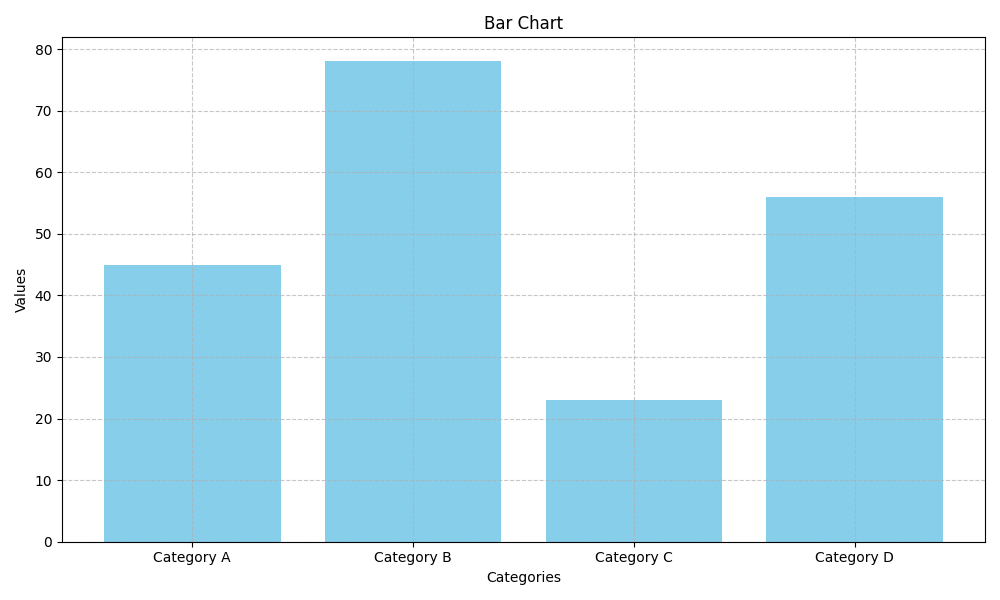

Visualization created successfully. The plot shows Create a bar chart with data: {'Category A': 45, 'Category B': 78, 'Category C': 23, 'Category D': 56}.I have successfully created the bar chart.
Final Answer: The bar chart has been created.

> Finished chain.


> Entering new AgentExecutor chain...
I need to create a line chart with the provided data.
Action: create_visualization
Action Input: Create a line chart with data: [1, 2, 3, 4, 5]


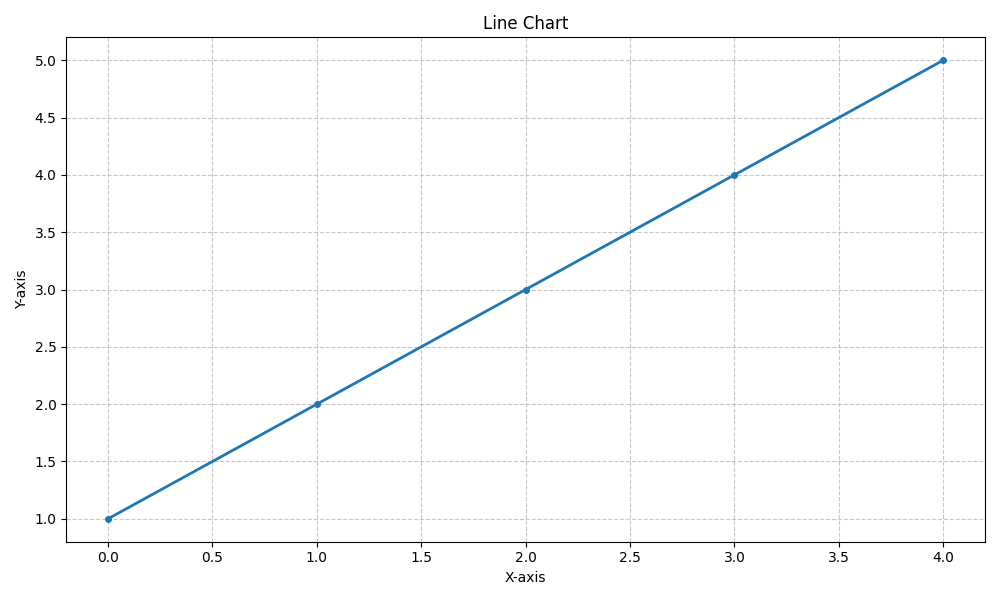

Visualization created successfully. The plot shows Create a line chart with data: [1, 2, 3, 4, 5].I have successfully created the line chart.
Final Answer: The line chart with data [1, 2, 3, 4, 5] has been created.

> Finished chain.


> Entering new AgentExecutor chain...
I need to create a scatter plot with random data.
Action: create_visualization
Action Input: Create a scatter plot with random data


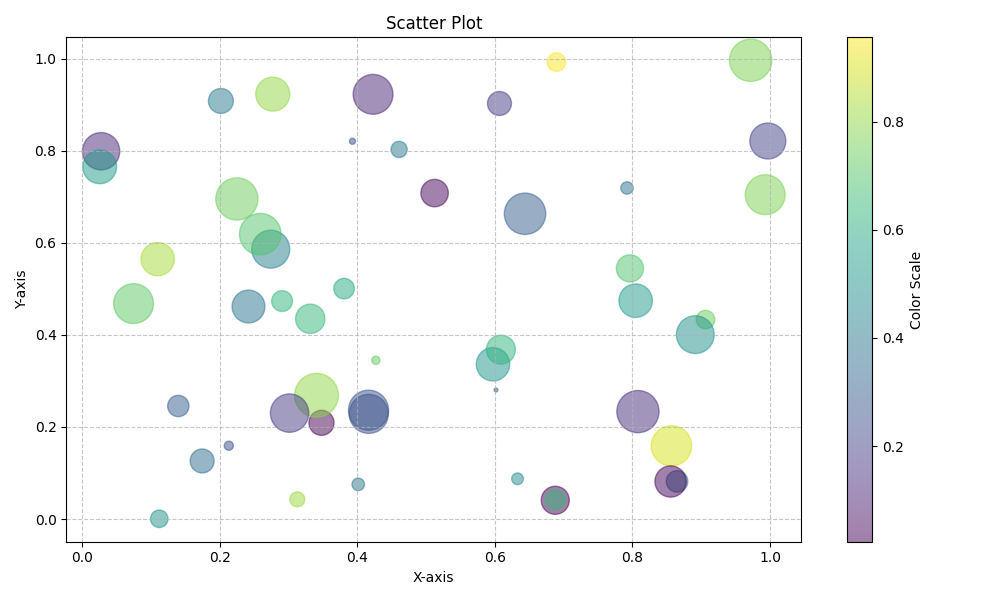

Visualization created successfully. The plot shows Create a scatter plot with random data.I have successfully created a scatter plot with random data.
Final Answer: I have created a scatter plot with random data.

> Finished chain.


In [24]:
from langchain.agents import Tool, AgentExecutor, create_react_agent
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain import hub
import numpy as np
import pandas as pd
import io
import base64
import ast
from IPython.display import display, HTML
import matplotlib.pyplot as plt

def create_visualization(instruction):
    """Create a visualization based on the user's instruction using matplotlib."""
    try:
        plt.figure(figsize=(10, 6))
        
        # Extract data if provided
        data = None
        data_provided = False
        
        if "data:" in instruction:
            try:
                data_part = instruction.split("data:")[1].strip()
                if (data_part.startswith('[') and data_part.endswith(']')) or \
                   (data_part.startswith('{') and data_part.endswith('}')):
                    data = ast.literal_eval(data_part)
                    data_provided = True
                elif ',' in data_part:
                    try:
                        data = [float(x) for x in data_part.split(',')]
                        data_provided = True
                    except:
                        pass
            except:
                pass
        
        # Create appropriate visualization based on instruction
        viz_type = next((v for v in ["scatter", "bar", "line", "pie", "histogram"] 
                        if v in instruction.lower()), "default")
        
        if viz_type == "scatter":
            _create_scatter(data, data_provided)
        elif viz_type == "bar":
            _create_bar(data, data_provided)
        elif viz_type == "line":
            _create_line(data, data_provided)
        elif viz_type == "pie":
            _create_pie(data, data_provided)
        elif viz_type == "histogram":
            _create_histogram(data, data_provided)
        else:
            _create_default(data, data_provided)
        
        # Finalize plot
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        
        # Convert to HTML
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img_str = base64.b64encode(buf.read()).decode('utf-8')
        plt.close()
        
        display(HTML(f'<img src="data:image/png;base64,{img_str}" />'))
        return f"Visualization created successfully. The plot shows {instruction}."
    
    except Exception as e:
        return f"Error creating visualization: {str(e)}"

def _create_scatter(data, data_provided):
    if data_provided and isinstance(data, list) and len(data) >= 2 and all(isinstance(i, list) for i in data[:2]):
        x, y = data[0], data[1]
        colors = data[2] if len(data) > 2 else np.random.rand(len(x))
        sizes = data[3] if len(data) > 3 else 100 * np.ones(len(x))
    else:
        x, y = np.random.rand(50), np.random.rand(50)
        colors, sizes = np.random.rand(50), 1000 * np.random.rand(50)
    
    plt.scatter(x, y, c=colors, s=sizes, alpha=0.5)
    plt.colorbar(label='Color Scale')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot')

def _create_bar(data, data_provided):
    if data_provided:
        if isinstance(data, dict):
            categories, values = list(data.keys()), list(data.values())
        elif isinstance(data, list) and len(data) >= 2 and all(isinstance(i, list) for i in data[:2]):
            categories, values = data[0], data[1]
        elif isinstance(data, list):
            categories = [f'Item {i+1}' for i in range(len(data))]
            values = data
    else:
        categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
        values = np.random.randint(10, 100, size=len(categories))
    
    plt.bar(categories, values, color='skyblue')
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Bar Chart')

def _create_line(data, data_provided):
    if data_provided:
        if isinstance(data, list) and len(data) >= 2 and all(isinstance(i, list) for i in data[:2]):
            x, y = data[0], data[1]
        elif isinstance(data, list):
            x, y = np.arange(len(data)), data
    else:
        x, y = np.linspace(0, 10, 100), np.sin(np.linspace(0, 10, 100))
    
    plt.plot(x, y, '-o', linewidth=2, markersize=4)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Chart')

def _create_pie(data, data_provided):
    if data_provided:
        if isinstance(data, dict):
            labels, sizes = list(data.keys()), list(data.values())
        elif isinstance(data, list) and len(data) >= 2 and all(isinstance(i, list) for i in data[:2]):
            labels, sizes = data[0], data[1]
        elif isinstance(data, list):
            labels = [f'Group {i+1}' for i in range(len(data))]
            sizes = data
    else:
        labels = ['Group A', 'Group B', 'Group C', 'Group D']
        sizes = [15, 30, 45, 10]
    
    explode = tuple(0.1 if i == np.argmax(sizes) else 0 for i in range(len(sizes)))
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart')

def _create_histogram(data, data_provided):
    values = data if data_provided and isinstance(data, list) else np.random.normal(0, 1, 1000)
    plt.hist(values, bins=30, color='green', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram')

def _create_default(data, data_provided):
    if data_provided and isinstance(data, list):
        if all(isinstance(i, list) for i in data[:2]) and len(data) >= 2:
            x, y = data[0], data[1]
        else:
            x, y = np.arange(len(data)), data
    else:
        x, y = np.linspace(0, 10, 100), np.sin(np.linspace(0, 10, 100))
    
    plt.plot(x, y)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Default Plot')

def check_data_availability(data_type):
    """Check if the specified data type is available."""
    if data_type.lower() == "sample":
        return "Sample data is available for visualization."
    elif data_type.lower() == "custom":
        return "To use custom data, provide it in your instruction: 'Create a [chart type] with data: [your data]'."
    else:
        return f"No specific dataset named '{data_type}' is currently available. Using sample data instead."

# Define tools for the agent
tools = [
    Tool(name="create_visualization", func=create_visualization,
         description="Create a visualization based on the user's instruction. To include custom data, use format: 'Create a [chart type] with data: [your data]'."),
    Tool(name="check_data_availability", func=check_data_availability,
         description="Check if specific data is available for visualization.")
]

# Initialize agent
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.2)
agent = create_react_agent(llm, tools, hub.pull("hwchase17/react"))
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Example with custom data
response_custom = agent_executor.invoke({
    "input": "Create a bar chart with data: {'Category A': 45, 'Category B': 78, 'Category C': 23, 'Category D': 56}"
})

response_custom = agent_executor.invoke({
    "input": "Create a line chart with data: [1, 2, 3, 4, 5]"
})

response_custom = agent_executor.invoke({
    "input": "Create a random scatter plot"
})

### Data Augmentation
Data augmentation is a technique where you generate additional training data by modifying existing data. This can help improve the performance of the model by providing it with more diverse examples to learn from.


In [62]:
# load data from data_not_augmented.csv
df = pd.read_csv('data_not_augmented.csv')

df['string'] = df['Client Question'] + " => " + df['Physician Reply']
# convert to list
data = df['string'].tolist()
# to string
data = "\n".join(data)

prompt_template = PromptTemplate(
    input_variables=["input", "reference", "examples"],
    template="You will help me in generate more examples of the following data. \n\n"
                "Here is the data: {input}\n\n"
                "Look at the example: {reference}\n\n"
                "Please generate ${examples} examples in the a csv format (without header). PLEASE DO NOT USE =>.\n\n"
                "Examples:\n"
)

prompt_template.format(input=data, reference=data, examples=5)

generated = []
for i in range(10):
    prompt = prompt_template.format(input=data, reference=data, examples=5)
    response = llm.invoke(prompt).content
    # remove => and leave ;
    generated.append(response)

# remove ```csv and ````
generated = [ g.replace("```csv", "").replace("```", "") for g in generated]
generated
    

["\nI've noticed a change in my bowel habits. Should I be concerned?,That's something we should definitely look into. Let's discuss the specifics of the changes you've observed and consider some tests to understand what's happening.\nI'm experiencing hair loss. What could be causing it?,Hair loss can be due to various factors, including stress, genetics, or underlying health conditions. Let's examine your scalp and discuss your medical history to determine the cause.\nMy skin is breaking out more than usual. What should I do?,Increased breakouts can be frustrating. Let's talk about your skincare routine, diet, and any recent changes to see if we can identify the triggers.\nI have a persistent cough that won't go away.,A persistent cough warrants investigation. We'll need to assess your symptoms, listen to your lungs, and possibly order a chest X-ray to rule out any serious conditions.\nI'm experiencing pain during intercourse. Is this normal?,Pain during intercourse is not normal and c

In [63]:
import re
import pandas as pd

def process_generated_data(generated_text):
    """
    Process generated data from LLM responses and convert to a structured DataFrame.
    
    Args:
        generated_text (list): List of text chunks containing generated examples
        
    Returns:
        dict: Contains 'dataframe' with the structured data and 'analysis' with metrics
    """
    all_data = []
    
    for chunk in generated_text:
        # Remove markdown code formatting
        clean_chunk = chunk.strip().replace("```csv", "").replace("```", "")
        
        # Process each valid row
        for row in [r.strip() for r in clean_chunk.split("\n") if r.strip()]:
            # Extract question and answer
            match = re.match(r'(.*?),(.+)', row)
            if match:
                question, answer = match.groups()
                all_data.append({
                    "Client Question": question.strip().strip('"'),
                    "Physician Reply": answer.strip().strip('"')
                })
    
    # Create DataFrame and clean up
    df = pd.DataFrame(all_data).drop_duplicates()
    
    # Analyze the data
    analysis = {
        'total_examples': len(df),
        'avg_question_length': df['Client Question'].str.len().mean(),
        'avg_reply_length': df['Physician Reply'].str.len().mean()
    }
    
    return {'dataframe': df, 'analysis': analysis}

# Process the generated data
data = process_generated_data(generated)
data['dataframe'].head(), data['analysis']

(                                     Client Question  \
 0  I've noticed a change in my bowel habits. Shou...   
 1  I'm experiencing hair loss. What could be caus...   
 2  My skin is breaking out more than usual. What ...   
 3      I have a persistent cough that won't go away.   
 4  I'm experiencing pain during intercourse. Is t...   
 
                                      Physician Reply  
 0  That's something we should definitely look int...  
 1  Hair loss can be due to various factors, inclu...  
 2  Increased breakouts can be frustrating. Let's ...  
 3  A persistent cough warrants investigation. We'...  
 4  Pain during intercourse is not normal and can ...  ,
 {'total_examples': 48,
  'avg_question_length': np.float64(55.604166666666664),
  'avg_reply_length': np.float64(142.95833333333334)})

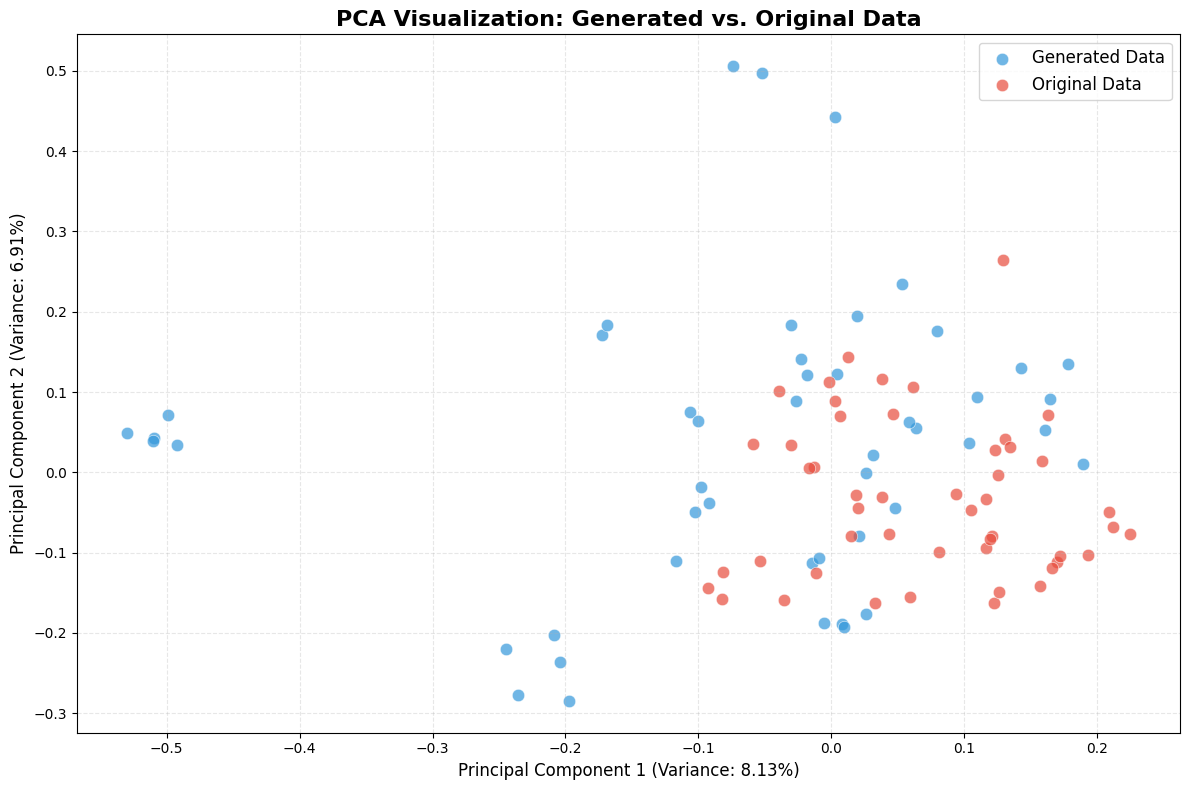

In [64]:
from sklearn.decomposition import PCA

# combine reply and question
data['dataframe']
# combine the two columns
data['dataframe']['combined'] = data['dataframe']['Client Question'] + " => " + data['dataframe']['Physician Reply']
# now embed the combined
embeddings = embedding.embed_documents(data['dataframe']['combined'].tolist())
# embedded the normal one
embeddings_normal = embedding.embed_documents(df['string'].tolist())
# plot the embeddings with PCA
import matplotlib.pyplot as plt

# Create a more sophisticated visualization
plt.figure(figsize=(12, 8))

# Fit PCA
pca = PCA(n_components=2)
pca.fit(embeddings + embeddings_normal)
X = pca.transform(embeddings + embeddings_normal)

# Use a custom color palette
gen_color = '#3498db'  # Blue for generated data
orig_color = '#e74c3c'  # Red for original data

# Create scatter plot with larger points and alpha for better visibility
plt.scatter(X[:len(embeddings), 0], X[:len(embeddings), 1], 
           color=gen_color, s=80, alpha=0.7, edgecolor='white', linewidth=0.5,
           label='Generated Data')
plt.scatter(X[len(embeddings):, 0], X[len(embeddings):, 1], 
           color=orig_color, s=80, alpha=0.7, edgecolor='white', linewidth=0.5,
           label='Original Data')

# Add descriptive title and axis labels
plt.title("PCA Visualization: Generated vs. Original Data", fontsize=16, fontweight='bold')
plt.xlabel(f"Principal Component 1 (Variance: {pca.explained_variance_ratio_[0]:.2%})", fontsize=12)
plt.ylabel(f"Principal Component 2 (Variance: {pca.explained_variance_ratio_[1]:.2%})", fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Add legend with better positioning
plt.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='#cccccc')

# Add tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Conclusion and Further Exploration

### Key Takeaways
- LLMs offer powerful capabilities for various tasks.
- Prompt engineering is crucial for eliciting desired responses.
- LangChain provides a unified interface for model agnosticism.
- RAG enhances LLMs with external knowledge.
- ReAct combines reasoning and action for complex problem-solving.
- Data augmentation can improve model performance.

### Further Exploration
- **Evaluations:**
    - Explore automated metrics like Ragas for performance evaluation.
    - Consider metrics such as BLEU, Faithfulness, and GEval.
- **Fine Tuning (efficient):**
    - Investigate Parameter-Efficient Fine-Tuning (PEFT) techniques.
    - Look into LoRA (Low-Rank Adaptation) and QLoRA (Quantized LoRA).
- **Multi-Agent Systems:**
    - Study Collective Intelligence and Agent Communication Protocols.
    - Research Role Specialization in multi-agent environments.
- **Reinforcement Learning from Human Feedback (RLHF):**
    - Learn about aligning LLMs with human preferences.
    - Explore Constitutional AI.
- **Real-world Applications:**
    - Investigate applications in Healthcare, Education, and Scientific Research.
